In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df_performance = pd.read_csv('data/student_performance.csv')

# view sample of the data
df_performance.head()

,student_id,name,attendance,assignment,quiz,lab,midterm_exam,final_exam
0,0,Andrew Mahmood,80,54,87,64,38,68
1,1,Thomas Martin,21,67,81,55,78,96
2,2,Dr Bradley Lambert,49,91,20,99,38,76
3,3,Christine Reynolds,67,40,63,46,27,93
4,4,Mrs Catherine Watson,45,29,85,63,71,31


In [8]:
# calculate the average score, average of  assignment, quiz, lab, mid and final exams
df_performance['final_score'] = round(df_performance[['assignment', 'quiz', 'lab', 'midterm_exam', 'final_exam']].sum(axis=1) / 5, 0)

df_performance.head()

,student_id,name,attendance,assignment,quiz,lab,midterm_exam,final_exam,final_score
0,0,Andrew Mahmood,80,54,87,64,38,68,62.0
1,1,Thomas Martin,21,67,81,55,78,96,75.0
2,2,Dr Bradley Lambert,49,91,20,99,38,76,65.0
3,3,Christine Reynolds,67,40,63,46,27,93,54.0
4,4,Mrs Catherine Watson,45,29,85,63,71,31,56.0


In [9]:
# determine if the student has passed or failed the course
df_performance['pass'] = (df_performance['final_score'] >= 50).astype(int)
df_performance.head()

,student_id,name,attendance,assignment,quiz,lab,midterm_exam,final_exam,final_score,pass
0,0,Andrew Mahmood,80,54,87,64,38,68,62.0,1
1,1,Thomas Martin,21,67,81,55,78,96,75.0,1
2,2,Dr Bradley Lambert,49,91,20,99,38,76,65.0,1
3,3,Christine Reynolds,67,40,63,46,27,93,54.0,1
4,4,Mrs Catherine Watson,45,29,85,63,71,31,56.0,1


In [10]:
(df_performance['pass'] ==0).sum()

np.int64(1665)

## Build a Model to Predict Success

Model Accuracy: 0.967


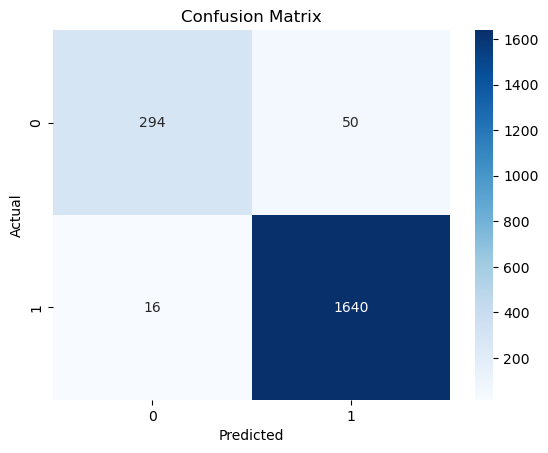

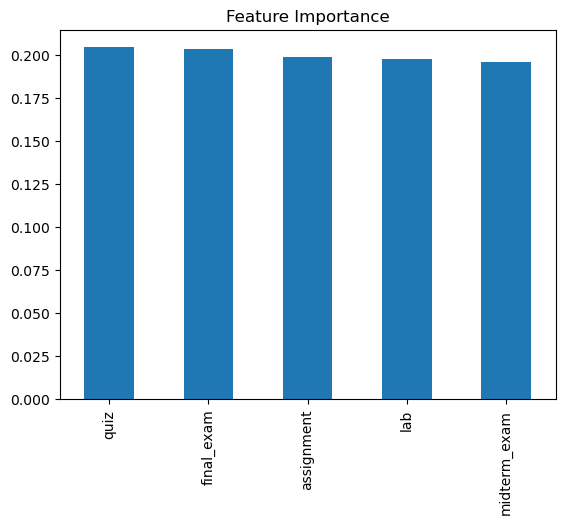

In [11]:
#%%writefile train_classifier.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('data/student_performance.csv')

# calculate the average score, average of  assignment, quiz, lab, mid and final exams
df['final_score'] = round(df[['assignment', 'quiz', 'lab', 'midterm_exam', 'final_exam']].sum(axis=1) / 5, 0)

# determine if the student has passed or failed the course
df['pass'] = (df['final_score'] >= 50).astype(int)

# features
X = df[ [ 'assignment', 'quiz', 'lab', 'midterm_exam', 'final_exam']]
y = df['pass']

# split your data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# create and train a model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# evaluate model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')


# How well is the model's prediction of pass or fail?
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# How the features rank in terms of importance to predict student passing or failing?
# Feature importance
features = pd.Series(model.feature_importances_, index=X.columns)
features.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

## Engagement Tracker Dashboard

In [12]:
# %%writefile engagement_tracker.py
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html

# Load data
df = pd.read_csv('data/engagement_data.csv')

# data aggregation
engagement_summary = df.groupby('resource_type').agg(
    avg_time_spent=('time_spent', 'mean'),
    completion_rate=('completion', 'mean')
).reset_index()

# create Dash app
app = Dash(__name__)

###### CREATE CHARTs
# create bar chart
fig = px.bar(
    engagement_summary,
    x='resource_type',
    y='avg_time_spent',
    title='Average Time Spent by Resource Type',
    text='avg_time_spent'
)

# create line chart
fig2 = px.line(
    engagement_summary,
    x='resource_type',
    y='completion_rate',
    title='Completion Rate by Resource Type',
    markers=True
)

# layout
app.layout = html.Div([
    html.H1('Course Engagement Dashboard'),
    dcc.Graph(figure=fig),
    dcc.Graph(figure=fig2),
    html.Label('Filter by Metric'),
    dcc.Dropdown(
        id='metric-dropdown',
        options=[{'label': 'Time Spent', 'value': 'time'}, {'label': 'Completion Rate', 'value': 'rate'}],
        value='time'
    )
])


if __name__ == '__main__':
    app.run(port=8052, debug=True)